In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
import warnings
warnings.filterwarnings('ignore')

all_data = pd.read_csv("E:/Kaggle_Practice/LotteMembers/pdde_copu_lpay_data.csv")
demo = pd.read_csv("E:/Kaggle_Practice/LotteMembers/LPOINT_BIG_COMP_01_DEMO.csv")
demo_1 = pd.read_csv("E:/Kaggle_Practice/LotteMembers/demo_1.csv")
demo_2 = pd.read_csv("E:/Kaggle_Practice/LotteMembers/demo_2.csv")
pdde = pd.read_csv("E:/Kaggle_Practice/LotteMembers/LPOINT_BIG_COMP_02_PDDE.csv")
copu = pd.read_csv("E:/Kaggle_Practice/LotteMembers/LPOINT_BIG_COMP_03_COP_U.csv")
pdclac = pd.read_csv("E:/Kaggle_Practice/LotteMembers/LPOINT_BIG_COMP_04_PD_CLAC.csv")
br = pd.read_csv("E:/Kaggle_Practice/LotteMembers/LPOINT_BIG_COMP_05_BR.csv")
lpay = pd.read_csv("E:/Kaggle_Practice/LotteMembers/LPOINT_BIG_COMP_06_LPAY.csv")
pdde_copu = pd.read_csv("E:/Kaggle_Practice/LotteMembers/pdde_copu.csv")
lpay_pdde = pd.read_csv("E:/Kaggle_Practice/LotteMembers/pdde_lpay.csv")
cust_top25 = pd.read_csv("E:/Kaggle_Practice/LotteMembers/cust_top25.csv")

## 나이별, 성별 온라인 쇼핑 시간 분석

In [5]:
pdde_demo_1 = pd.merge(pdde, demo_1, on="cust", how="left")

In [6]:
pdde_demo_off = pdde_demo_1[pdde_demo_1['chnl_dv'] == 1]
pdde_demo_off

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct,ma_fem_dv,ages,zon_hlv,spent,lpay_num,asso_num,freq
0,M430112881,A01000001113,1,A01,A010039,PD0290,20210101,10,15000.0,1,여성,50대,Z17,2977947.0,0.0,1.0,415.0
1,M646853852,A01000002265,1,A01,A010025,PD1369,20210101,10,79700.0,1,여성,40대,Z13,9165313.0,0.0,63.0,353.0
2,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1,여성,50대,Z17,2977947.0,0.0,1.0,415.0
3,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1,여성,50대,Z17,2977947.0,0.0,1.0,415.0
4,M430112881,A01000004946,1,A01,A010039,PD0290,20210101,10,19000.0,1,여성,50대,Z17,2977947.0,0.0,1.0,415.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4305574,M410988874,A05004789375,1,A05,A050133,PD0418,20211231,17,139000.0,1,여성,50대,Z10,1233681.0,0.0,0.0,32.0
4305575,M747846235,A05004790059,1,A05,A050318,PD1670,20211231,19,9900.0,1,여성,40대,Z06,8503196.0,0.0,10.0,494.0
4305576,M358176583,A05004791626,1,A05,A050436,PD1677,20211231,17,9400.0,1,남성,30대,Z07,4587000.0,3.0,2.0,36.0
4305577,M960949233,A05004792656,1,A05,A050039,PD1645,20211231,17,7900.0,1,남성,50대,Z17,14389709.0,15.0,20.0,553.0


In [9]:
p_off = pd.merge(pdde_demo_off, pdclac, on="pd_c", how="left")
p_on = pd.merge(pdde_demo_on, pdclac, on="pd_c", how="left")

In [8]:
pdde_demo_on = pdde_demo_1[pdde_demo_1['chnl_dv'] == 2]
pdde_demo_on

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct,ma_fem_dv,ages,zon_hlv,spent,lpay_num,asso_num,freq
424,M533330698,E01000012036,2,A01,NaN,PD0954,20210101,1,39000.0,1,여성,30대,Z03,5381310.0,22.0,11.0,106.0
425,M661395471,E01000013847,2,A01,NaN,PD1706,20210101,10,168000.0,1,남성,40대,Z04,536520.0,0.0,9.0,56.0
426,M594992791,E01000014987,2,A01,NaN,PD1810,20210101,11,30000.0,1,여성,40대,Z06,8812830.0,1.0,11.0,225.0
427,M263406446,E01000015117,2,A01,NaN,PD0302,20210101,12,335000.0,1,여성,40대,Z10,55565330.0,7.0,10.0,377.0
428,M182645944,E01000016766,2,A01,NaN,PD1782,20210101,13,107100.0,1,남성,20대,Z17,1805660.0,27.0,17.0,141.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4381738,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1,남성,40대,Z10,6521172.0,5.0,13.0,260.0
4381739,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1,남성,40대,Z10,6521172.0,5.0,13.0,260.0
4381740,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1,남성,40대,Z10,6521172.0,5.0,13.0,260.0
4381741,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1,남성,40대,Z10,6521172.0,5.0,13.0,260.0


In [6]:
pd.set_option('display.max_rows', None)
pdde_demo_off.groupby('ages')['de_hr'].value_counts()

ages  de_hr
20대   18        27657
      19        25542
      17        22976
      20        22746
      16        21015
      15        17951
      14        16873
      21        16867
      13        16306
      12        15404
      22         9857
      11         9757
      10         5412
      23         2760
      9          1903
      8          1708
      0          1705
      1          1231
      7           976
      2           713
      6           562
      4           373
      3           360
      5           313
30대   17        98780
      18        97439
      16        93245
      19        86360
      15        83182
      14        73199
      20        71550
      13        70023
      12        69209
      11        51986
      21        48935
      10        27147
      22        20718
      9          5561
      8          5422
      23         3894
      7          2900
      0          2158
      1          1071
      6           991
      2           73

In [7]:
pd.set_option('display.max_rows', None)
pdde_demo_off.groupby('ma_fem_dv')['de_hr'].value_counts()

ma_fem_dv  de_hr
남성         18       124212
           17       121545
           19       115777
           16       112984
           20       102555
           15       100515
           14        87165
           13        80370
           12        80099
           21        73359
           11        64698
           22        34665
           10        34551
           9          8269
           23         7617
           8          7592
           7          5343
           0          4789
           1          2502
           6          2151
           2          1408
           5           996
           3           736
           4           714
여성         17       313703
           16       303217
           18       301415
           15       277085
           19       247787
           14       241307
           13       217867
           12       209713
           20       203451
           11       163812
           21       134343
           10        77872
           

#### 오프라인 구매는 여성은 5시, 남성은 6시 구매를 자주 함

In [8]:
pd.set_option('display.max_rows', None)
pdde_demo_on.groupby('ages')['de_hr'].value_counts()

ages  de_hr
20대   11         912
      12         801
      10         746
      15         706
      16         700
      13         626
      19         620
      18         617
      23         610
      14         604
      17         538
      22         527
      9          518
      20         495
      0          466
      21         424
      1          385
      8          367
      2          142
      3          123
      7          104
      5           81
      4           50
      6           50
30대   11        9039
      10        8508
      12        8220
      13        6860
      14        6793
      15        6765
      17        5973
      16        5854
      9         5839
      23        5812
      22        5355
      21        4497
      0         4479
      20        4393
      18        4179
      19        3969
      8         3758
      1         2400
      7         1989
      2         1287
      6         1049
      3          913
      5          709
 

#### 온라인은 오전시간때 사람들이 구매를 많이 함

### 온라인에서 제일 구매를 많이 하는 상품은?

In [11]:
p_on

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct,ma_fem_dv,ages,zon_hlv,spent,lpay_num,asso_num,freq,pd_nm,clac_hlv_nm,clac_mcls_nm
0,M533330698,E01000012036,2,A01,NaN,PD0954,20210101,1,39000.0,1,여성,30대,Z03,5381310.0,22.0,11.0,106.0,여성스웨터/풀오버,여성의류,여성의류상의
1,M661395471,E01000013847,2,A01,NaN,PD1706,20210101,10,168000.0,1,남성,40대,Z04,536520.0,0.0,9.0,56.0,남성백팩,패션잡화,남성가방
2,M594992791,E01000014987,2,A01,NaN,PD1810,20210101,11,30000.0,1,여성,40대,Z06,8812830.0,1.0,11.0,225.0,남성장갑,패션잡화,장갑
3,M263406446,E01000015117,2,A01,NaN,PD0302,20210101,12,335000.0,1,여성,40대,Z10,55565330.0,7.0,10.0,377.0,남성패딩,남성의류,남성의류아우터
4,M182645944,E01000016766,2,A01,NaN,PD1782,20210101,13,107100.0,1,남성,20대,Z17,1805660.0,27.0,17.0,141.0,여성스니커즈,패션잡화,여성화
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428496,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1,남성,40대,Z10,6521172.0,5.0,13.0,260.0,백화점/마트모바일상품권,상품권,모바일상품권
428497,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1,남성,40대,Z10,6521172.0,5.0,13.0,260.0,백화점/마트모바일상품권,상품권,모바일상품권
428498,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1,남성,40대,Z10,6521172.0,5.0,13.0,260.0,백화점/마트모바일상품권,상품권,모바일상품권
428499,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1,남성,40대,Z10,6521172.0,5.0,13.0,260.0,백화점/마트모바일상품권,상품권,모바일상품권


In [26]:
p_off

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct,ma_fem_dv,ages,zon_hlv,spent,lpay_num,asso_num,freq,pd_nm,clac_hlv_nm,clac_mcls_nm
0,M430112881,A01000001113,1,A01,A010039,PD0290,20210101,10,15000.0,1,여성,50대,Z17,2977947.0,0.0,1.0,415.0,남성티셔츠,남성의류,남성의류상의
1,M646853852,A01000002265,1,A01,A010025,PD1369,20210101,10,79700.0,1,여성,40대,Z13,9165313.0,0.0,63.0,353.0,기타주방일회용품,주방잡화,주방일회용품
2,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1,여성,50대,Z17,2977947.0,0.0,1.0,415.0,남성티셔츠,남성의류,남성의류상의
3,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1,여성,50대,Z17,2977947.0,0.0,1.0,415.0,남성티셔츠,남성의류,남성의류상의
4,M430112881,A01000004946,1,A01,A010039,PD0290,20210101,10,19000.0,1,여성,50대,Z17,2977947.0,0.0,1.0,415.0,남성티셔츠,남성의류,남성의류상의
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3953237,M410988874,A05004789375,1,A05,A050133,PD0418,20211231,17,139000.0,1,여성,50대,Z10,1233681.0,0.0,0.0,32.0,이어폰/헤드폰,모바일,모바일액세서리
3953238,M747846235,A05004790059,1,A05,A050318,PD1670,20211231,19,9900.0,1,여성,40대,Z06,8503196.0,0.0,10.0,494.0,키보드,컴퓨터,컴퓨터주변기기
3953239,M358176583,A05004791626,1,A05,A050436,PD1677,20211231,17,9400.0,1,남성,30대,Z07,4587000.0,3.0,2.0,36.0,기타컴퓨터액세서리,컴퓨터,컴퓨터주변기기
3953240,M960949233,A05004792656,1,A05,A050039,PD1645,20211231,17,7900.0,1,남성,50대,Z17,14389709.0,15.0,20.0,553.0,캡슐원두커피,커피/차,원두커피


### 온라인 상품의 종류(대분류)

In [25]:
print(p_on['clac_hlv_nm'].unique())
print(p_on['clac_hlv_nm'].nunique())

['여성의류' '패션잡화' '남성의류' '헬스/피트니스' '화장품/뷰티케어' '속옷/양말/홈웨어' '출산/육아용품' '스포츠패션'
 '냉장/세탁가전' '주방잡화' '가구' '커피/차' '퍼스널케어' '유아동의류' '식기/조리기구' '생활/주방가전' '침구/수예'
 '청소/세탁/욕실용품' '축산물' '과일' '건강식품' '인테리어/조명' '아웃도어/레저' '음료' '시즌스포츠' '과자'
 '대용식' '조미료' '냉동식품' '건해산물' '채소' '구기/필드스포츠' '유제품' '양곡' '컴퓨터' '냉장식품' '상품권'
 '영상/음향가전' '수산물' '세제/위생' '건강용품' '조리식품' '모바일' '병통조림' '원예/애완' '유아식품'
 '서적/음반/악기' '주류' '자동차용품' '완구' '문구/사무용품' '공구/안전용품' '계절가전' '생활/렌탈서비스'
 '기타(비상품)' '테넌트/음식점' '여행/레저서비스']
57


### 오프라인 상품의 종류(대분류)

In [28]:
print(p_off['clac_hlv_nm'].unique())
print(p_off['clac_hlv_nm'].nunique())

['남성의류' '주방잡화' '테넌트/음식점' '속옷/양말/홈웨어' '구기/필드스포츠' '여성의류' '음료' '아웃도어/레저'
 '유아동의류' '패션잡화' '스포츠패션' '식기/조리기구' '과자' '조리식품' '침구/수예' '대용식' '헬스/피트니스'
 '서적/음반/악기' '생활/렌탈서비스' '조미료' '주류' '수산물' '완구' '채소' '유아식품' '시즌스포츠' '과일'
 '상품권' '냉장식품' '냉동식품' '축산물' '자동차용품' '커피/차' '화장품/뷰티케어' '계절가전' '가구' '건강식품'
 '영상/음향가전' '양곡' '유제품' '생활/주방가전' '냉장/세탁가전' '여행/레저서비스' '세제/위생' '퍼스널케어' '컴퓨터'
 '문구/사무용품' '모바일' '원예/애완' '병통조림' '건강용품' '출산/육아용품' '공구/안전용품' '건해산물'
 '인테리어/조명' '청소/세탁/욕실용품' '기타(비상품)' '담배' '기타상품' '금융/보험서비스']
60


### 오프라인에서는 구매를 했지만 온라인에서는 구매하지 않은 상품의 종류(대분류)

In [30]:
a = p_on['clac_hlv_nm'].unique()
b = p_off['clac_hlv_nm'].unique()
print(np.setdiff1d(b, a))
print(len(np.setdiff1d(b, a)))

['금융/보험서비스' '기타상품' '담배']
3


### 온라인 상품의 종류(중분류)

In [31]:
print(p_on['clac_mcls_nm'].unique())
print(p_on['clac_mcls_nm'].nunique())

['여성의류상의' '남성가방' '장갑' '남성의류아우터' '여성화' '피트니스' '스킨케어' '남성케어' '메이크업' '홈웨어'
 '남성화' '여성의류아우터' '남성의류하의' '유아안전용품' '향수' '선케어' '남성골프의류' '남성의류상의' '유아동화'
 '여성등산/아웃도어의류' '패션액세서리' '여성특수목적의류' '냉장/냉동고' '주방정리용품/소모품' '유아동속옷' '거실가구'
 '여성의류하의' '시계' '남성지갑' '커피/차세트' '헤어케어' '차류' '남아의류아우터' '그릇/식기' '이미용가전'
 '바디케어' '모자' '유아위생용품' '수예소품' '여성지갑' '사무용/학생용가구' '여아의류하의' '정리용품' '기타국소고기'
 '수입과일' '과일선물세트' '축산선물세트' '여성의류전신' '유아동일반스포츠의류' '영양제' '장식용품' '남성등산/아웃도어의류'
 '성인침구' '유아의류아우터' '등산' '보석' '여성가방' '유아의류세트' '면도용품' '남아의류상의' '침실가구' '여성속옷'
 '조리기구' '홍삼/인삼가공식품' '캐쥬얼가방' '여성양말류' '여아의류아우터' '핸드/풋케어' '기능성음료' '스키/보드'
 '유아의류상의' '남성패션액세서리' '남성양말류' '세탁기' '건강보조식품' '주방가전' '꿀' '여성일반스포츠의류' '비스킷류'
 '레토르트' '장류' '냉동간편식' '남아의류하의' '반건생선' '국산과일' '뿌리채소' '여성특수소재의류' '밀폐/보관용기'
 '기타구기/필드스포츠' '여아의류상의' '계란류' '남성속옷' '우유' '남성특수목적의류' '우산/양산류' '열매채소'
 '유아동양말류' '유아동가구' '채소선물세트' '조미료세트' '수영/물놀이' '건과일' '여아의류전신' '쌀' '구강케어'
 '한방약재' '사탕/캔디' '컴퓨터/노트북' '건어물' '남아의류세트' '전통과자류' '초콜릿' '과채음료' '해조류' '포장반찬'
 '유아발육용품' '조미료류' '모바일상품권' '주방가구' 'TV' '수산선물세트' '속옷/양말/홈웨어세트' '세탁

### 오프라인 상품의 종류(중분류)

In [35]:
print(p_off['clac_mcls_nm'].unique())
print(p_off['clac_mcls_nm'].nunique())

['남성의류상의' '주방일회용품' '식당' '남성양말류' '기타구기/필드스포츠' '여성의류아우터' '여성의류상의' '커피음료'
 '기타아웃도어/레저' '남성의류아우터' '남아의류상의' '장갑' '남성등산/아웃도어의류' '조리도구' '그릇/식기'
 '남성일반스포츠의류' '과자세트' '스포츠잡화' '여아의류상의' '푸드코트' '베이커리' '여성가방' '남성스포츠화' '성인침구'
 '남성의류세트' '차음료' '빵' '패션액세서리' '피트니스' '캐쥬얼가방' '남성의류하의' '유아동화' '남성화' '서적'
 '유아의류아우터' '생활서비스' '레토르트' '여성의류세트' '모자' '남아의류아우터' '보석' '여성골프의류' '사탕/캔디'
 '장류' '주류세트' '골프' '여성스포츠화' '여성화' '떡' '여성의류하의' '조리기구' '간편조리' '남성골프의류'
 '교육완구' '여아의류전신' '즉석반찬' '잎채소' '남성특수소재의류' '유아의류상의' '유아간식' '수영/물놀이' '수입과일'
 '유아의류세트' '와인' '여성등산/아웃도어의류' '유아동일반스포츠의류' '비스킷류' '남성지갑' '홈웨어' '여성양말류'
 '유아동스포츠화' '스포츠댄스' '냉장조리' '남성속옷' '지류상품권' '디저트' '아이스크림' '스낵류' '육가공품'
 '액세서리편의용품' '과채음료' '국산과일' '여성의류전신' '원두커피' '선케어' '열매채소' '남아완구' '스킨케어'
 '냉방가전' '사무용/학생용가구' '영양제' '카메라/캠코더' '향수' '메이크업' '조미료류' '잡곡' '햄/소시지' '소스류'
 '국산소고기' '요구르트' '뿌리채소' '계란류' '향신료' '식용유류' '여성속옷' 'TV' '청소기' '세탁기'
 '이용권/입장권' '세탁세제' '청소세제' '쌀' '시계' '건면' '바디케어' '양채류' '핸드/풋케어' '공기청정/가습/제습'
 '온장조리' '생수' '여성일반스포츠의류' '컴퓨터주변기기' '일반문구/사무용품' '안경/선글라스' '비식품테넌트' '유가공품'
 '모바일액세서리'

### 온라인에서는 구매를 했지만 오프라인에서는 구매하지 않은 상품의 종류(중분류)

In [33]:
a = p_on['clac_mcls_nm'].unique()
b = p_off['clac_mcls_nm'].unique()
print(np.setdiff1d(a, b))
print(len(np.setdiff1d(a, b)))

['격투기' '모바일상품권' '사무기기' '소모품' '여행/레저' '오토바이' '임산부케어용품']
7


### 오프라인에서는 구매를 했지만 온라인에서는 구매하지 않은 상품의 종류(중분류)

In [34]:
a = p_on['clac_mcls_nm'].unique()
b = p_off['clac_mcls_nm'].unique()
print(np.setdiff1d(b, a))
print(len(np.setdiff1d(b, a)))

['가공유' '가방세트' '기타가구' '기프트' '남성의류전신' '남성특수소재의류' '남아의류전신' '남아특수소재의류' '동물병원'
 '렌탈수수료' '미국산소고기' '배구' '보험' '비식품테넌트' '생활요금상품판매/충전' '수입돼지고기' '야외용가구'
 '양곡선물세트' '여아특수소재의류' '용기보증금' '유아동스포츠화' '유아특수목적의류' '음료세트' '일반담배' '임대매출'
 '잡화균일가' '전자담배' '즉석음료류' '특수담배' '특판' '푸드코트' '호주산소고기']
32


### 온라인 상품의 종류(소분류)

In [36]:
print(p_on['pd_nm'].nunique())

1431


### 온프라인 상품의 종류(소분류)

In [37]:
print(p_off['pd_nm'].nunique())

1849


### 온라인에서는 구매를 했지만 오프라인에서는 구매하지 않은 상품의 종류(소분류)

In [38]:
a = p_on['pd_nm'].unique()
b = p_off['pd_nm'].unique()
print(np.setdiff1d(a, b))
print(len(np.setdiff1d(a, b)))

['DVD플레이어' 'OLED' '격투기의류/용품' '관상조용품' '관악기' '광학기기/과학상자' '그늘막/타프' '그릇/식기세트'
 '기름종이' '기타DVD/홈시어터액세서리' '기타광학기기' '냉풍기' '네비게이션' '녹즙기/원액기' '놀이방매트' '농구복'
 '농구화' '니삭스/오버니삭스' '라디오/튜너' '러닝/워킹머신' '레저모바일상품권' '멜빵' '뮤직센터' '미니벨로' '미러류'
 '반건오징어' '반짇고리/세트' '배달서비스' '배드민턴화' '백화점/마트모바일상품권' '보호대/보행보조용품'
 '복근/벨트마사지기구' '붙박이장' '블랙박스' '생활모바일상품권' '서적세트' '수입산소앞다리' '숙박' '스팀청소기'
 '스파/워터파크이용권' '식기건조기' '식음료모바일상품권' '악기/교육렌탈' '악기부품/액세서리' '양념육선물세트' '업소용냉장고'
 '여권/통장지갑' '연수기' '연필깎이' '엽산/철분' '영상물' '영화/문화모바일상품권' '오토바이액세서리'
 '온라인/모바일컨텐츠' '유아공부상/디딤대' '유아동시계' '유아동침대' '유아동패드/스프레드' '유아두유' '유지보수품'
 '임산부바디케어' '임산부스킨케어' '자동차/레저렌탈' '자석놀이' '장롱' '전기냄비/뚝배기' '전동보드/전동킥보드' '절단기'
 '제모기' '제본기' '족욕기' '주방수납장' '지구의/지도' '책장' '침구청소기' '코르셋' '테니스라켓' '테니스화'
 '튜브/보트' '파쇄기' '학습악기류' '항아리/쌀독류' '협탁']
83


### 오프라인에서는 구매를 했지만 온라인에서는 구매하지 않은 상품의 종류(소분류)

In [39]:
a = p_on['pd_nm'].unique()
b = p_off['pd_nm'].unique()
print(np.setdiff1d(b, a))
print(len(np.setdiff1d(b, a)))

['2단우산' 'MTB' '가공메추리알' '가공우유' '가방세트' '간편과일' '갑오징어' '갓' '개조개' '건다시마' '건반악기'
 '건홍합' '고구마스낵' '고기양념장' '고양이식기/급수' '고양이이동장' '곡물선물세트' '곤약' '골뱅이' '공병/공박스'
 '공병/모델링팩전용도구' '곶감선물세트' '과실주/담금주' '과실주병' '과일스낵' '과채음료세트' '광택제' '교통카드판매'
 '국산담배' '국산돼지갈매기살' '국산돼지갈비' '국산돼지뒷다리' '국산돼지등심' '국산돼지등심덧살' '국산돼지목심'
 '국산돼지부산물' '국산돼지사태' '국악악기' '군모' '그림/인테리어렌탈' '기능성껌' '기능성우유' '기능성음료세트'
 '기능성캔디' '기저귀크림/파우더' '기타TV' '기타가구' '기타건면' '기타건해산물선물세트' '기타게' '기타고기'
 '기타기능성음료' '기타남성양말류' '기타남성의류세트' '기타남성화' '기타남아의류아우터' '기타남아특수목적의류' '기타냉동간편식'
 '기타농구용품' '기타란' '기타레토르트' '기타보험' '기타생활서비스' '기타속옷/양말/홈웨어세트' '기타수산통조림' '기타양주'
 '기타어류' '기타여성양말류' '기타여성의류세트' '기타여성특수목적의류' '기타여아아우터' '기타여아특수목적의류' '기타열매채소'
 '기타영유아아우터' '기타영유아특수목적의류' '기타온장조리' '기타유아동양말류' '기타음료세트' '기타전자/비디오게임'
 '기타전통주' '기타조미료세트' '기타파티/팬시용품' '기타포장생선' '기타프리믹스' '기타회' '기프트샵' '김밥재료세트'
 '꼬치류' '꿀세트' '남성가운' '남성골프남방셔츠' '남성골프스웨트셔츠/후드/집업' '남성골프의류세트' '남성등산/아웃도어세트'
 '남성등산전신' '남성레인부츠/슈즈' '남성수면양말' '남성스포츠속옷' '남성점프수트/오버롤' '남성캐쥬얼스포츠양말' '남성코스튬'
 '남성피혁의류' '남성학생복' '남성향수세트' '남아레깅스' '남아베스트' '남아스웨트셔츠/후드/집업' '남아실내복

In [21]:
p_on['clac_mcls_nm'].value_counts().head(20)

스낵류        19493
레토르트       15865
우유         15744
국산과일       14415
냉동간편식      13157
두부/콩나물류    12800
봉지라면       12693
잎채소        12586
모바일상품권     12087
요구르트       11275
생수          9840
계란류         8907
열매채소        8522
수입과일        8129
소스류         7606
비스킷류        6891
국산돼지고기      6808
햄/소시지       6757
뿌리채소        6113
탄산음료        5972
Name: clac_mcls_nm, dtype: int64

In [20]:
p_off['clac_mcls_nm'].value_counts().head(20)

스낵류        184204
식당         125569
국산과일       104320
요구르트        95344
비스킷류        94771
잎채소         93076
청소용품        92299
우유          89695
맥주          87669
두부/콩나물류     86984
수입과일        73480
봉지라면        73224
냉동간편식       67073
열매채소        65217
레토르트        63853
탄산음료        61727
파티/팬시용품     61206
냉장간편식       55018
용기라면        52365
어묵/맛살       51568
Name: clac_mcls_nm, dtype: int64

In [46]:
p_on

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct,ma_fem_dv,ages,zon_hlv,spent,lpay_num,asso_num,freq,pd_nm,clac_hlv_nm,clac_mcls_nm
0,M533330698,E01000012036,2,A01,NaN,PD0954,20210101,1,"39,000.00",1,여성,30대,Z03,"5,381,310.00",22.00,11.00,106.00,여성스웨터/풀오버,여성의류,여성의류상의
1,M661395471,E01000013847,2,A01,NaN,PD1706,20210101,10,"168,000.00",1,남성,40대,Z04,"536,520.00",0.00,9.00,56.00,남성백팩,패션잡화,남성가방
2,M594992791,E01000014987,2,A01,NaN,PD1810,20210101,11,"30,000.00",1,여성,40대,Z06,"8,812,830.00",1.00,11.00,225.00,남성장갑,패션잡화,장갑
3,M263406446,E01000015117,2,A01,NaN,PD0302,20210101,12,"335,000.00",1,여성,40대,Z10,"55,565,330.00",7.00,10.00,377.00,남성패딩,남성의류,남성의류아우터
4,M182645944,E01000016766,2,A01,NaN,PD1782,20210101,13,"107,100.00",1,남성,20대,Z17,"1,805,660.00",27.00,17.00,141.00,여성스니커즈,패션잡화,여성화
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428496,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,"50,000.00",1,남성,40대,Z10,"6,521,172.00",5.00,13.00,260.00,백화점/마트모바일상품권,상품권,모바일상품권
428497,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,"50,000.00",1,남성,40대,Z10,"6,521,172.00",5.00,13.00,260.00,백화점/마트모바일상품권,상품권,모바일상품권
428498,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,"50,000.00",1,남성,40대,Z10,"6,521,172.00",5.00,13.00,260.00,백화점/마트모바일상품권,상품권,모바일상품권
428499,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,"50,000.00",1,남성,40대,Z10,"6,521,172.00",5.00,13.00,260.00,백화점/마트모바일상품권,상품권,모바일상품권


In [29]:
o = ['M000136117','M999962961','M999849895']

In [30]:
cust = demo['cust'].values

import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm

onlinee = pd.DataFrame()
for i in tqdm(o):
    if i in p_on['cust'].values:
        z = p_on[p_on['cust']== i]
        df = pd.DataFrame({'cust':z.cust.unique(), 'online':z['rct_no'].nunique()})
    else:
        a = demo[demo['cust'] == i]
        df = pd.DataFrame({'cust':a.cust, 'online':'0'})
    onlinee =  pd.concat([onlinee, df], ignore_index=True)


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 33.04it/s]


In [28]:
a = pdde[pdde['cust'] == 'M999962961']
a[a['chnl_dv']==2]['rct_no'].nunique()

6

In [ ]:
copu

In [17]:

pd.set_option('display.max_rows', None)
pdde[pdde['cust'] == 'M000136117']

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct
10458,M000136117,A01007342225,1,A01,A010018,PD1764,20210108,17,1570000.0,1
10512,M000136117,A01007377556,1,A01,A010018,PD0957,20210108,17,159000.0,1
10540,M000136117,A01007392333,1,A01,A010018,PD0640,20210108,17,216000.0,1
10581,M000136117,A01007429896,1,A01,A010018,PD0964,20210108,18,1060000.0,1
10588,M000136117,A01007433795,1,A01,A010018,PD0964,20210108,18,840000.0,1
11841,M000136117,A01008276939,1,A01,A010018,PD0964,20210109,14,950000.0,1
11871,M000136117,A01008297739,1,A01,A010018,PD1854,20210109,14,38000.0,1
20850,M000136117,A01014438334,1,A01,A010018,PD0977,20210115,13,2230000.0,1
20990,M000136117,A01014543116,1,A01,A010018,PD0960,20210115,14,300000.0,1
21382,M000136117,A01014804139,1,A01,A010018,PD1618,20210115,16,977800.0,1


In [31]:
onlinee

,cust,online
0,M000136117,6
1,M999962961,6
2,M999849895,0


In [ ]:
z = 

In [50]:
cust = demo['cust'].values

import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm

offline = pd.DataFrame()
for i in tqdm(cust):
    if i in p_off['cust'].values:
        z = p_off[p_off['cust']== i]
        df = pd.DataFrame({'cust':z.cust.unique(), 'off_num':len(z['rct_no'])})
    else:
        a = demo[demo['cust'] == i]
        df = pd.DataFrame({'cust':a.cust, 'off_num':'0'})
    offline =  pd.concat([offline, df], ignore_index=True)

100%|██████████████████████████████████████████████████████████████████████████| 29913/29913 [2:19:15<00:00,  3.58it/s]


In [53]:
demo_3 = pd.merge(demo_1, online, on='cust', how = 'left')
demo_3

,cust,ma_fem_dv,ages,zon_hlv,spent,lpay_num,asso_num,freq,online
0,M000034966,여성,40대,Z07,"654,120.00",0.00,1.00,51.00,0
1,M000059535,여성,30대,Z12,0.00,0.00,1.00,0.00,0
2,M000136117,여성,30대,Z11,"27,373,630.00",4.00,15.00,109.00,13
3,M000201112,여성,50대,Z17,"53,120.00",0.00,0.00,21.00,0
4,M000225114,여성,40대,Z17,"1,937,700.00",0.00,10.00,159.00,0
...,...,...,...,...,...,...,...,...,...
29908,M999708287,여성,40대,Z10,0.00,0.00,2.00,0.00,0
29909,M999770689,여성,30대,Z16,"1,187,140.00",79.00,15.00,315.00,17
29910,M999849895,여성,20대,Z04,"1,103,792.00",0.00,1.00,72.00,0
29911,M999926092,남성,30대,Z08,0.00,0.00,7.00,0.00,0


In [54]:
demo_2 = pd.merge(demo_3, offline, on='cust', how = 'left')
demo_2

,cust,ma_fem_dv,ages,zon_hlv,spent,lpay_num,asso_num,freq,online,off_num
0,M000034966,여성,40대,Z07,"654,120.00",0.00,1.00,51.00,0,51
1,M000059535,여성,30대,Z12,0.00,0.00,1.00,0.00,0,0
2,M000136117,여성,30대,Z11,"27,373,630.00",4.00,15.00,109.00,13,96
3,M000201112,여성,50대,Z17,"53,120.00",0.00,0.00,21.00,0,21
4,M000225114,여성,40대,Z17,"1,937,700.00",0.00,10.00,159.00,0,159
...,...,...,...,...,...,...,...,...,...,...
29908,M999708287,여성,40대,Z10,0.00,0.00,2.00,0.00,0,0
29909,M999770689,여성,30대,Z16,"1,187,140.00",79.00,15.00,315.00,17,298
29910,M999849895,여성,20대,Z04,"1,103,792.00",0.00,1.00,72.00,0,72
29911,M999926092,남성,30대,Z08,0.00,0.00,7.00,0.00,0,0


In [60]:
pdde

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct
0,M430112881,A01000001113,1,A01,A010039,PD0290,20210101,10,"15,000.00",1
1,M646853852,A01000002265,1,A01,A010025,PD1369,20210101,10,"79,700.00",1
2,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,"19,000.00",1
3,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,"19,000.00",1
4,M430112881,A01000004946,1,A01,A010039,PD0290,20210101,10,"19,000.00",1
...,...,...,...,...,...,...,...,...,...,...
4381738,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,"50,000.00",1
4381739,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,"50,000.00",1
4381740,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,"50,000.00",1
4381741,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,"50,000.00",1


In [64]:
w = pdde[pdde['cust']=='M999770689']
w['chnl_dv'].value_counts()

1    298
2     17
Name: chnl_dv, dtype: int64

In [27]:
pdde.shape

(4381743, 10)

In [55]:
demo_2.to_csv("demo_2.csv", index = False)

In [57]:
data = pd.read_csv("demo_2.csv")

In [58]:
data

,cust,ma_fem_dv,ages,zon_hlv,spent,lpay_num,asso_num,freq,online,off_num
0,M000034966,여성,40대,Z07,"654,120.00",0.00,1.00,51.00,0,51
1,M000059535,여성,30대,Z12,0.00,0.00,1.00,0.00,0,0
2,M000136117,여성,30대,Z11,"27,373,630.00",4.00,15.00,109.00,13,96
3,M000201112,여성,50대,Z17,"53,120.00",0.00,0.00,21.00,0,21
4,M000225114,여성,40대,Z17,"1,937,700.00",0.00,10.00,159.00,0,159
...,...,...,...,...,...,...,...,...,...,...
29908,M999708287,여성,40대,Z10,0.00,0.00,2.00,0.00,0,0
29909,M999770689,여성,30대,Z16,"1,187,140.00",79.00,15.00,315.00,17,298
29910,M999849895,여성,20대,Z04,"1,103,792.00",0.00,1.00,72.00,0,72
29911,M999926092,남성,30대,Z08,0.00,0.00,7.00,0.00,0,0


In [45]:
demo_1

,cust,ma_fem_dv,ages,zon_hlv,spent,lpay_num,asso_num,freq
0,M000034966,여성,40대,Z07,"654,120.00",0.00,1.00,51.00
1,M000059535,여성,30대,Z12,0.00,0.00,1.00,0.00
2,M000136117,여성,30대,Z11,"27,373,630.00",4.00,15.00,109.00
3,M000201112,여성,50대,Z17,"53,120.00",0.00,0.00,21.00
4,M000225114,여성,40대,Z17,"1,937,700.00",0.00,10.00,159.00
...,...,...,...,...,...,...,...,...
29908,M999708287,여성,40대,Z10,0.00,0.00,2.00,0.00
29909,M999770689,여성,30대,Z16,"1,187,140.00",79.00,15.00,315.00
29910,M999849895,여성,20대,Z04,"1,103,792.00",0.00,1.00,72.00
29911,M999926092,남성,30대,Z08,0.00,0.00,7.00,0.00


In [42]:
pd.set_option('display.float_format','{:,.2f}'.format)
p_off.describe()

,chnl_dv,de_dt,de_hr,buy_am,buy_ct,spent,lpay_num,asso_num,freq
count,"3,953,242.00","3,953,242.00","3,953,242.00","3,953,242.00","3,953,242.00","3,953,242.00","3,953,242.00","3,953,242.00","3,953,242.00"
mean,1.00,"20,210,657.05",15.93,"23,957.07",1.31,"6,936,609.44",25.54,11.68,483.36
std,0.00,339.10,3.37,"240,895.07",1.61,"16,210,788.79",82.09,12.56,897.42
min,1.00,"20,210,101.00",0.00,1.00,1.00,10.00,0.00,0.00,1.00
25%,1.00,"20,210,402.00",13.00,"2,000.00",1.00,"1,675,760.00",0.00,1.00,168.00
50%,1.00,"20,210,628.00",16.00,"3,990.00",1.00,"3,360,700.00",0.00,10.00,331.00
75%,1.00,"20,210,922.00",18.00,"9,000.00",1.00,"6,516,058.00",16.00,16.00,581.00
max,1.00,"20,211,231.00",23.00,"64,000,000.00",100.00,"386,581,410.00","1,183.00",261.00,"12,448.00"


### 온라인 구매 고개중 엘페이를 사용하는 고객은 몇명일까?

In [40]:
p_on

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct,ma_fem_dv,ages,zon_hlv,spent,lpay_num,asso_num,freq,pd_nm,clac_hlv_nm,clac_mcls_nm
0,M533330698,E01000012036,2,A01,NaN,PD0954,20210101,1,39000.0,1,여성,30대,Z03,5381310.0,22.0,11.0,106.0,여성스웨터/풀오버,여성의류,여성의류상의
1,M661395471,E01000013847,2,A01,NaN,PD1706,20210101,10,168000.0,1,남성,40대,Z04,536520.0,0.0,9.0,56.0,남성백팩,패션잡화,남성가방
2,M594992791,E01000014987,2,A01,NaN,PD1810,20210101,11,30000.0,1,여성,40대,Z06,8812830.0,1.0,11.0,225.0,남성장갑,패션잡화,장갑
3,M263406446,E01000015117,2,A01,NaN,PD0302,20210101,12,335000.0,1,여성,40대,Z10,55565330.0,7.0,10.0,377.0,남성패딩,남성의류,남성의류아우터
4,M182645944,E01000016766,2,A01,NaN,PD1782,20210101,13,107100.0,1,남성,20대,Z17,1805660.0,27.0,17.0,141.0,여성스니커즈,패션잡화,여성화
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428496,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1,남성,40대,Z10,6521172.0,5.0,13.0,260.0,백화점/마트모바일상품권,상품권,모바일상품권
428497,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1,남성,40대,Z10,6521172.0,5.0,13.0,260.0,백화점/마트모바일상품권,상품권,모바일상품권
428498,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1,남성,40대,Z10,6521172.0,5.0,13.0,260.0,백화점/마트모바일상품권,상품권,모바일상품권
428499,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1,남성,40대,Z10,6521172.0,5.0,13.0,260.0,백화점/마트모바일상품권,상품권,모바일상품권


In [4]:
demo_2

,cust,ma_fem_dv,ages,zon_hlv,spent,lpay_num,asso_num,freq,on_num,off_num
0,M000034966,여성,40대,Z07,654120,0,1,51,0,51
1,M000059535,여성,30대,Z12,0,0,1,0,0,0
2,M000136117,여성,30대,Z11,27373630,4,15,109,13,96
3,M000201112,여성,50대,Z17,53120,0,0,21,0,21
4,M000225114,여성,40대,Z17,1937700,0,10,159,0,159
...,...,...,...,...,...,...,...,...,...,...
29908,M999708287,여성,40대,Z10,0,0,2,0,0,0
29909,M999770689,여성,30대,Z16,1187140,79,15,315,17,298
29910,M999849895,여성,20대,Z04,1103792,0,1,72,0,72
29911,M999926092,남성,30대,Z08,0,0,7,0,0,0


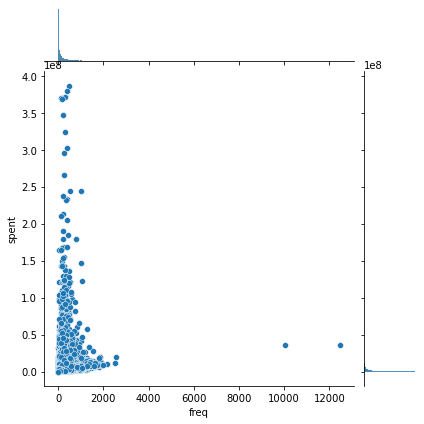

In [5]:
sns.jointplot(x='freq',y ='spent', data = demo_2)

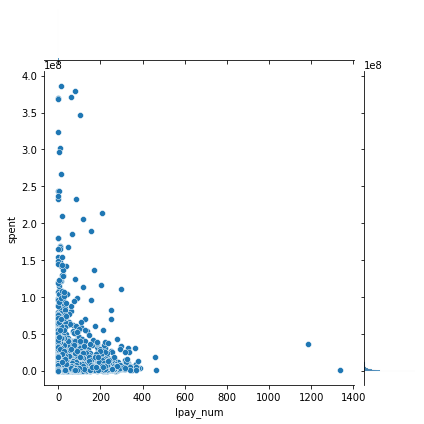

In [10]:
sns.jointplot(x='lpay_num',y ='buy_am', data = lpay)

In [11]:
pdde_demo_2 = pd.merge(pdde,demo_2,on='cust',how='left')
pdde_demo_2

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct,ma_fem_dv,ages,zon_hlv,spent,lpay_num,asso_num,freq,on_num,off_num
0,M430112881,A01000001113,1,A01,A010039,PD0290,20210101,10,15000.0,1,여성,50대,Z17,2977947,0,1,415,0,415
1,M646853852,A01000002265,1,A01,A010025,PD1369,20210101,10,79700.0,1,여성,40대,Z13,9165313,0,63,353,5,348
2,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1,여성,50대,Z17,2977947,0,1,415,0,415
3,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1,여성,50대,Z17,2977947,0,1,415,0,415
4,M430112881,A01000004946,1,A01,A010039,PD0290,20210101,10,19000.0,1,여성,50대,Z17,2977947,0,1,415,0,415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4381738,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1,남성,40대,Z10,6521172,5,13,260,37,223
4381739,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1,남성,40대,Z10,6521172,5,13,260,37,223
4381740,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1,남성,40대,Z10,6521172,5,13,260,37,223
4381741,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1,남성,40대,Z10,6521172,5,13,260,37,223


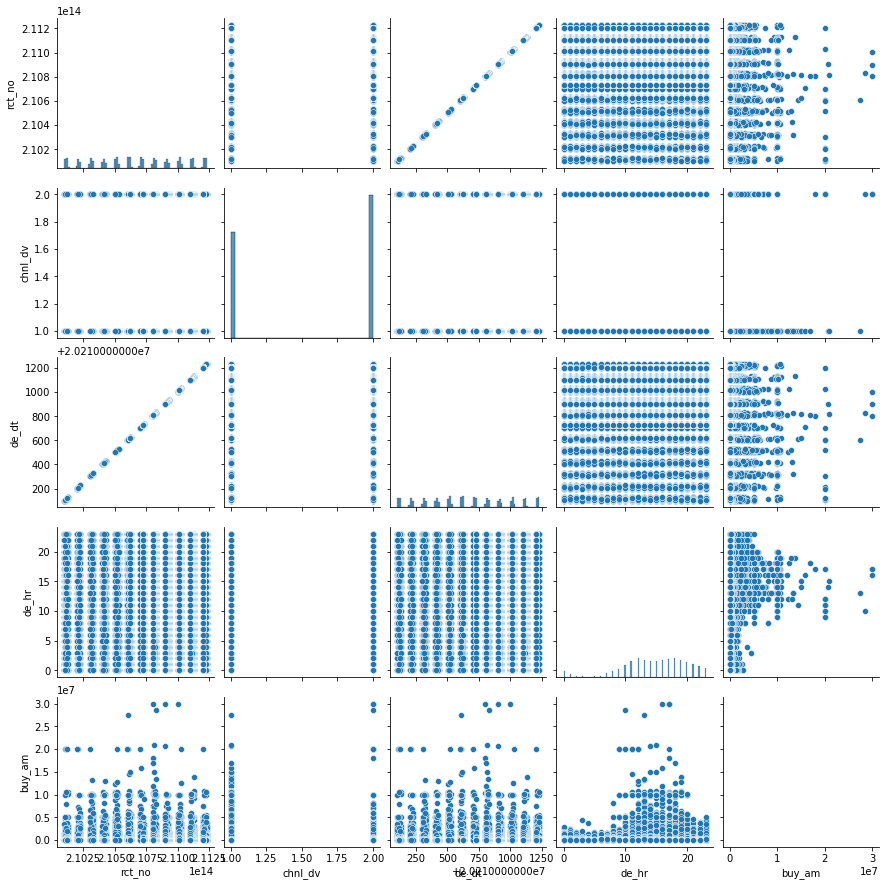

In [16]:
sns.pairplot(lpay)

In [3]:
lpay_yes = all_data[all_data['lpay_num']>0]
lpay_no = all_data[all_data['lpay_num']>0]

In [ ]:
sns.jointplot(x='lpay_num',y ='buy_am', data = lpay_yes)